In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\qizheng\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Pre-processing data

In [5]:
# Set features. This will also be used as your x values.
# selected_features = df[['names', 'of', 'selected', 'features', 'here']]
X = df.drop("koi_disposition", axis=1)

In [6]:
y = df["koi_disposition"]
print(X.shape, y.shape)

(6991, 40) (6991,)


In [7]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
X_scaler = MinMaxScaler().fit(X)
X_scaled = X_scaler.transform(X)

label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

# Feature Importance Selection



In [8]:
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X_scaled, encoded_y)
print(model.feature_importances_)

[0.12815001 0.16841944 0.12452508 0.05293845 0.01752756 0.01532574
 0.0144304  0.01306074 0.02356814 0.02333686 0.01308641 0.01121744
 0.0098193  0.01881758 0.02799385 0.02551748 0.02086209 0.01260285
 0.01235033 0.01255338 0.01147295 0.01071304 0.01448117 0.00950412
 0.00930493 0.00827526 0.03098418 0.00909662 0.01038821 0.02466728
 0.01681859 0.0113081  0.01022399 0.01521657 0.0089076  0.01105003
 0.00938297 0.01177671 0.0101971  0.01012745]


In [9]:
for i,v in enumerate(model.feature_importances_):
    #if v<0.01 and v>-0.01:
        print(f'Feature {i}: {X.columns[i]}, Score: {v}')

Feature 0: koi_fpflag_nt, Score: 0.12815000614143104
Feature 1: koi_fpflag_ss, Score: 0.16841944226756592
Feature 2: koi_fpflag_co, Score: 0.1245250813169431
Feature 3: koi_fpflag_ec, Score: 0.052938453091441656
Feature 4: koi_period, Score: 0.017527556492604658
Feature 5: koi_period_err1, Score: 0.015325736196643007
Feature 6: koi_period_err2, Score: 0.014430402662292709
Feature 7: koi_time0bk, Score: 0.013060735004162063
Feature 8: koi_time0bk_err1, Score: 0.02356813869848038
Feature 9: koi_time0bk_err2, Score: 0.023336857172203813
Feature 10: koi_impact, Score: 0.013086410649949991
Feature 11: koi_impact_err1, Score: 0.01121744044022342
Feature 12: koi_impact_err2, Score: 0.009819301446557077
Feature 13: koi_duration, Score: 0.018817582317737933
Feature 14: koi_duration_err1, Score: 0.0279938539707737
Feature 15: koi_duration_err2, Score: 0.02551748103625457
Feature 16: koi_depth, Score: 0.020862094273652692
Feature 17: koi_depth_err1, Score: 0.012602849237557492
Feature 18: koi_dep

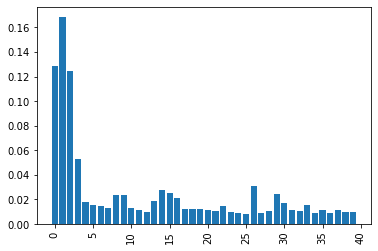

In [10]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(model.feature_importances_))], model.feature_importances_)
pyplot.xticks(rotation=90)
pyplot.show()

In [11]:
X_selected=df[["koi_fpflag_nt","koi_fpflag_ss","koi_fpflag_co","koi_fpflag_ec",
              "koi_period","koi_period_err1","koi_period_err2",
              "koi_time0bk","koi_time0bk_err1","koi_time0bk_err2",
              "koi_duration","koi_duration_err1","koi_duration_err2",
               "koi_depth","koi_depth_err1","koi_depth_err2",
              "koi_model_snr","koi_steff","koi_steff_err1","koi_steff_err2"]]

# Test selected data

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, random_state=1)

In [13]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train_scaled, encoded_y_train)
predictions = model.predict(X_test_scaled)

print(f"Training Data Score: {model.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.902745995423341
